In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('phndataset.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df=df.rename(columns={'battery_power': 'Battery_Power',
    'blue': 'Bluetooth',
    'clock_speed': 'Processor Speed ',
    'dual_sim': 'Dual SIM ',
    'fc': 'Front Camera ',
    'four_g': '4G Support ',
    'int_memory': 'Internal Storage ',
    'm_dep': 'Mobile Depth ',
    'mobile_wt': 'Mobile Weight ',
    'n_cores': 'Number of Processor Cores',
    'pc': 'Primary Camera ',
    'px_height': 'pixel_h ',
    'px_width': 'pixel_w ',
    'ram': 'RAM ',
    'sc_h': 'Screen_h ',
    'sc_w': 'Screen_w ',
    'talk_time': 'Battery Talk Time ',
    'three_g': '3G Support ',
    'touch_screen': 'Touchscreen ',
    'wifi': 'Wi-Fi ',})
df

,Battery_Power,Bluetooth,Processor Speed,Dual SIM,Front Camera,4G Support,Internal Storage,Mobile Depth,Mobile Weight,Number of Processor Cores,...,pixel_h,pixel_w,RAM,Screen_h,Screen_w,Battery Talk Time,3G Support,Touchscreen,Wi-Fi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.isnull().sum() # no null values

Battery_Power                0
Bluetooth                    0
Processor Speed              0
Dual SIM                     0
Front Camera                 0
4G Support                   0
Internal Storage             0
Mobile Depth                 0
Mobile Weight                0
Number of Processor Cores    0
Primary Camera               0
pixel_h                      0
pixel_w                      0
RAM                          0
Screen_h                     0
Screen_w                     0
Battery Talk Time            0
3G Support                   0
Touchscreen                  0
Wi-Fi                        0
price_range                  0
dtype: int64

In [5]:
df.info() #this shows no categorical values are there in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Battery_Power              2000 non-null   int64  
 1   Bluetooth                  2000 non-null   int64  
 2   Processor Speed            2000 non-null   float64
 3   Dual SIM                   2000 non-null   int64  
 4   Front Camera               2000 non-null   int64  
 5   4G Support                 2000 non-null   int64  
 6   Internal Storage           2000 non-null   int64  
 7   Mobile Depth               2000 non-null   float64
 8   Mobile Weight              2000 non-null   int64  
 9   Number of Processor Cores  2000 non-null   int64  
 10  Primary Camera             2000 non-null   int64  
 11  pixel_h                    2000 non-null   int64  
 12  pixel_w                    2000 non-null   int64  
 13  RAM                        2000 non-null   int64

In [6]:
type(df)

pandas.core.frame.DataFrame

C:\Users\Deepak\AppData\Local\Temp\ipykernel_1512\174841202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['price_range'], palette='viridis')


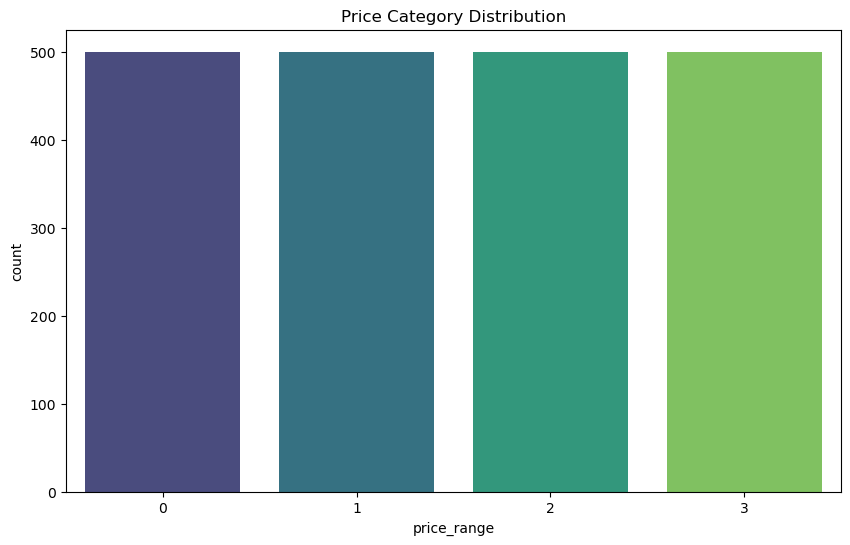

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['price_range'], palette='viridis')
plt.title("Price Category Distribution")
plt.show() #every price range are evenly distributed 0-low 1-medium 2-high 3-very high

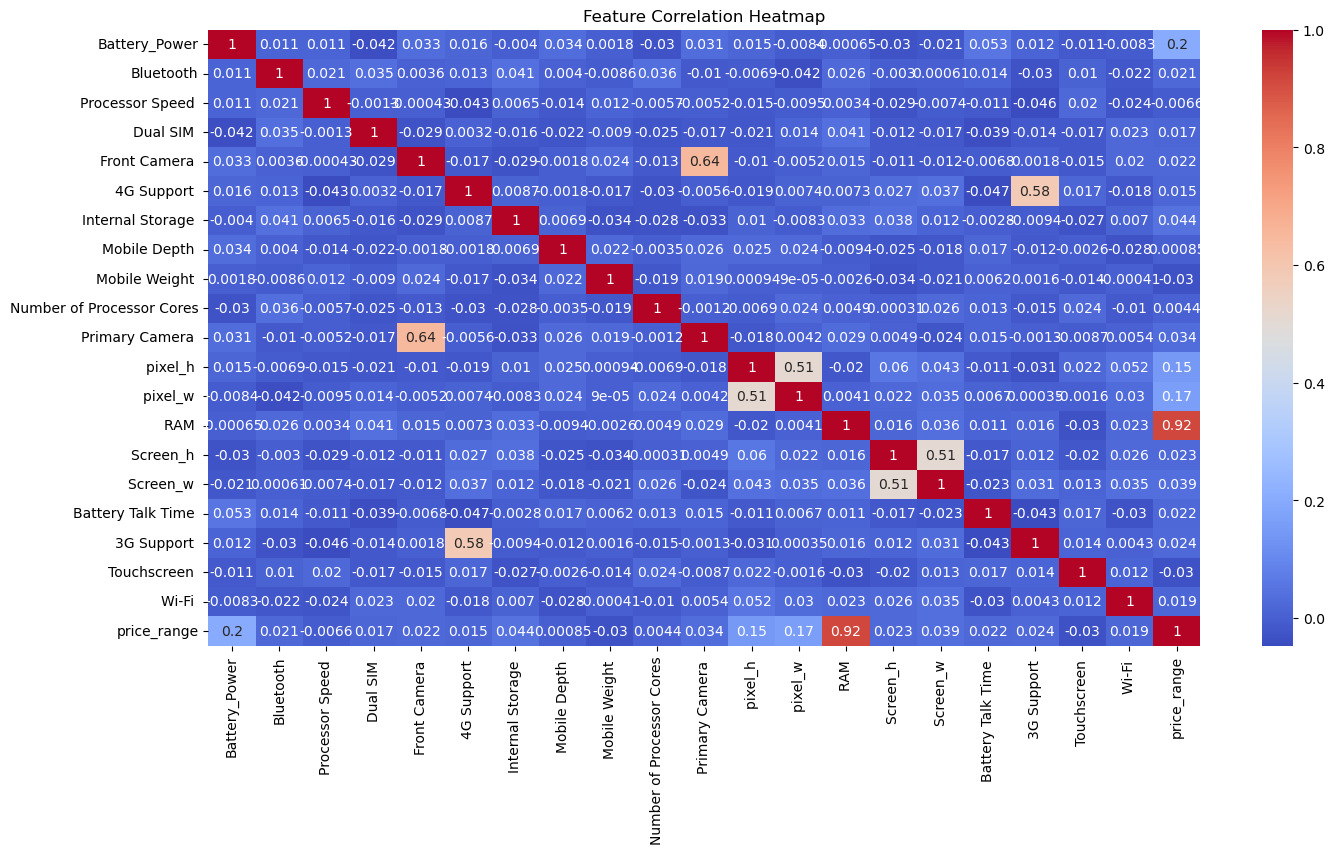

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df.columns=df.columns.str.strip()

In [10]:
print(df.columns.tolist())

['Battery_Power', 'Bluetooth', 'Processor Speed', 'Dual SIM', 'Front Camera', '4G Support', 'Internal Storage', 'Mobile Depth', 'Mobile Weight', 'Number of Processor Cores', 'Primary Camera', 'pixel_h', 'pixel_w', 'RAM', 'Screen_h', 'Screen_w', 'Battery Talk Time', '3G Support', 'Touchscreen', 'Wi-Fi', 'price_range']


In [11]:
df['overallpixel']=df['pixel_h'].values * df['pixel_w'].values
df['screen_area']=df['Screen_h'].values * df['Screen_w'].values

In [12]:
df.drop(columns=['pixel_h', 'pixel_w','Screen_h', 'Screen_w'], inplace=True)


In [13]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -0.4472136 ,
        -1.07303316, -0.22468605],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.4472136 ,
         1.07754147, -0.38092598],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.4472136 ,
         1.52135531, -0.75850582],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  1.34164079,
         0.61637375, -0.92776575],
       [ 0.62252745, -0.9900495 , -0.76274805, ..., -1.34164079,
        -0.81988539,  1.29865332],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  1.34164079,
        -0.65225095, -0.05542612]])

In [14]:
X = df.drop(columns=['price_range'])
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.82      0.84        91
           2       0.78      0.83      0.80        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



In [19]:
from sklearn.model_selection import cross_val_score
cv_r=cross_val_score(model,X,y,cv=5,scoring="accuracy")
print("csv1:",cv_r)
print("cm:",cv_r.mean()) #cv score indicates that the RF model is stable

csv1: [0.8825 0.8625 0.9025 0.88   0.87  ]
cm: 0.8795


In [20]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(max_iter=500)
model_log.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [21]:
y_pred=model_log.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy1 * 100:.2f}%")
print(classification_report(y_test,y_pred))

Accuracy: 92.50%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.90      0.91      0.91        91
           2       0.89      0.87      0.88        92
           3       0.94      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



In [22]:
lg=LogisticRegression()
cv_score=cross_val_score(lg,X,y,cv=5,scoring="accuracy")
print("cvs:",cv_score)
print("ma",cv_score.mean()) #the value differ from the model predicted values so the model is overfitting

cvs: [0.415  0.4675 0.42   0.4575 0.4475]
ma 0.4415


C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

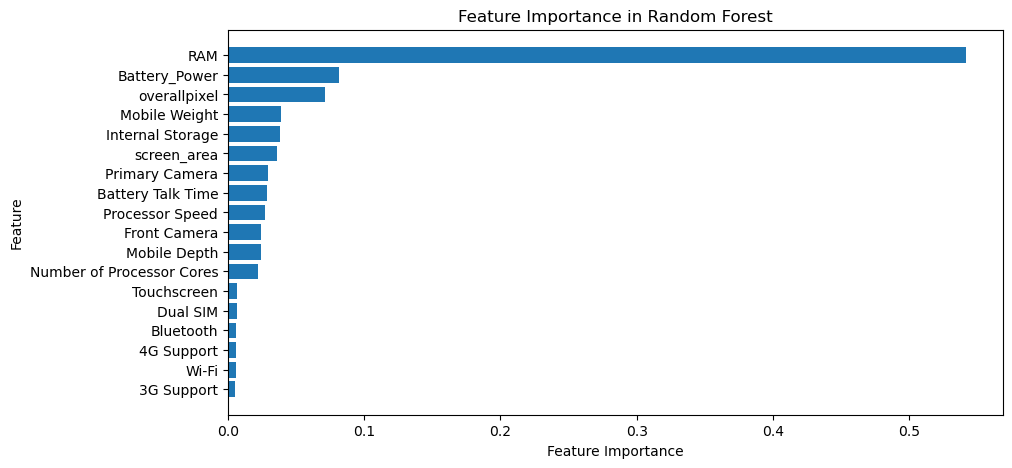

In [23]:
feature_importance = model.feature_importances_
features = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 5))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

In [24]:
X=X.drop(columns=['Touchscreen','Dual SIM','Bluetooth','4G Support','3G Support','Wi-Fi',])


In [25]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [26]:
model1 = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.82      0.84        91
           2       0.78      0.83      0.80        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



In [29]:
from sklearn.model_selection import cross_val_score
cv_rs=cross_val_score(model1,X,y,cv=5,scoring="accuracy")
print("csv1:",cv_rs)
print("cm:",cv_rs.mean()) #randomforest is the best model for this dataset

csv1: [0.8825 0.865  0.8875 0.885  0.87  ]
cm: 0.8779999999999999


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[100   5   0   0]
 [  7  75   9   0]
 [  0   8  76   8]
 [  0   0  12 100]]


In [31]:
import joblib
joblib.dump(model1, "random_forest_model.pkl")

['random_forest_model.pkl']

In [32]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [35]:
model = joblib.load("random_forest_model.pkl")
features = np.array([[1500, 1, 2.0, 1, 5, 1, 32, 0.5, 180, 4, 13, 1080, 1920, 4096, 9, 5, 15, 1]])
prediction = model.predict(features)
print("Price Range Predicted:", prediction[0])

Price Range Predicted: 3


In [36]:
print(X.iloc[5].values)
print(y.iloc[5]) #the model predicted correctly

[1.859000e+03 5.000000e-01 3.000000e+00 2.200000e+01 7.000000e-01
 1.640000e+02 1.000000e+00 7.000000e+00 1.067000e+03 1.000000e+01
 1.660616e+06 1.700000e+01]
1


In [ ]:
df["price"].iloc()